### Data Storytelling

In [1]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('starbucks.csv')

In [3]:
# explore first 5 rows of data
data.head()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


#### Questions we want to answer:

1. What are the different types of Starbucks foods and their counts?

2. What is the relationship between carbs and fat?

3. What is the relationship between carbs, fat, and calories?

4. What are the distributions of calories, fat, carbs, fiber, and protein?

5. What's a word cloud look like of the items?

6. What are the highest calorie items?

7. What are the "healthiest" items? Healthiest being lowest in fat and carbs, and highest in fiber and protein.

#### Question 1: What are the different types of Starbucks foods and their counts?

In [5]:
# print type value counts
data['type'].value_counts()

bakery           41
petite            9
bistro box        8
hot breakfast     8
sandwich          7
parfait           3
salad             1
Name: type, dtype: int64

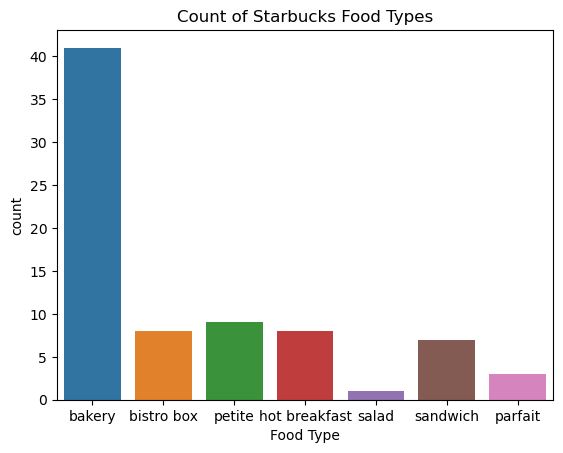

In [7]:
# plot in bar chart
sns.countplot(data=data, x='type')
plt.xlabel('Food Type')
plt.title('Count of Starbucks Food Types')
plt.show()

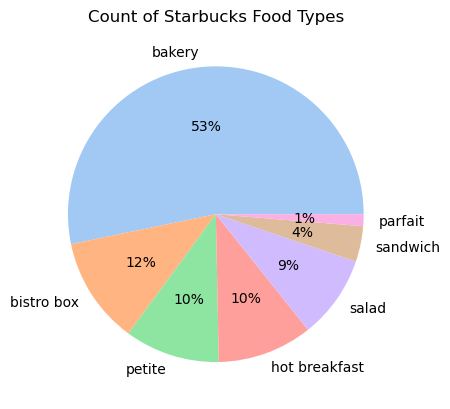

In [17]:
# plot in pie plot

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

values = data['type'].value_counts()

plt.pie(values, labels=data['type'].unique(), colors=colors, autopct='%.0f%%')
plt.title('Count of Starbucks Food Types')
plt.show()

From these plots we can see that Starbucks bakeries are the majority of their food. 

#### Question 2: What is the relationship between carbs and fat?

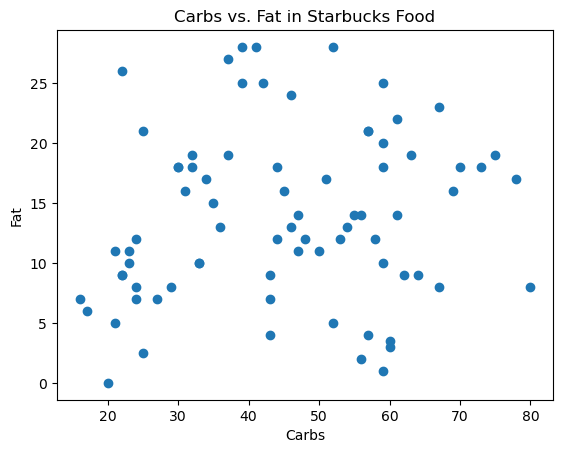

In [23]:
# scatter plot of carbs vs fat
plt.plot(data['carb'], data['fat'], marker='o', linestyle='none')
plt.xlabel('Carbs')
plt.ylabel('Fat')
plt.title('Carbs vs. Fat in Starbucks Food')
plt.show()

From this plot, there doesn't appear to be much correlation between carbs and fat. 

#### Question 3: What is the relationship between carbs, fat, and calories?

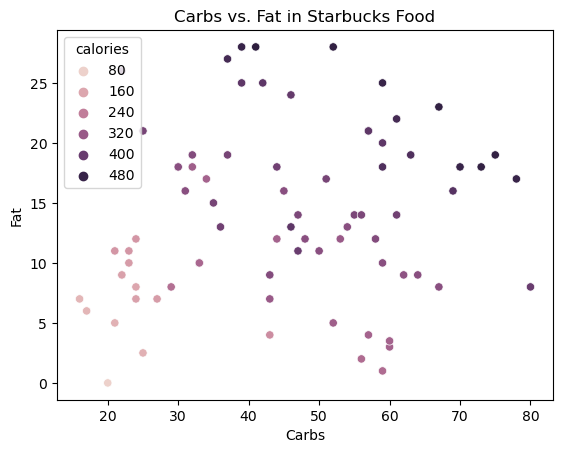

In [30]:
# scatter plot of carbs vs fat w/ color by calories
sns.scatterplot(data=data, x='carb', y='fat', hue='calories')
plt.xlabel('Carbs')
plt.ylabel('Fat')
plt.title('Carbs vs. Fat in Starbucks Food')
plt.show()

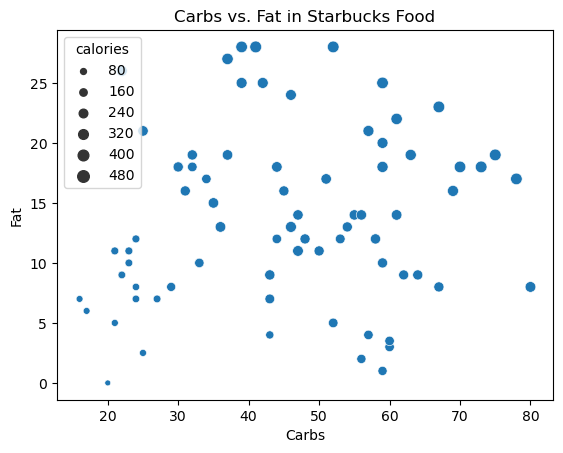

In [31]:
# scatter plot of carbs vs fat w/ size by calories
sns.scatterplot(data=data, x='carb', y='fat', size='calories')
plt.xlabel('Carbs')
plt.ylabel('Fat')
plt.title('Carbs vs. Fat in Starbucks Food')
plt.show()

From these two plots, we can see that calories tend to increase as carbs increase. Likewise, calories increase as fat increases.

#### Question 4: What are the distributions of calories, fat, carbs, fiber, and protein?

In [32]:
# subset data
data_subset = data[['calories', 'fat', 'carb', 'fiber', 'protein']]
data_subset.head()

,calories,fat,carb,fiber,protein
0,350,8.0,67,5,10
1,350,9.0,64,7,6
2,420,20.0,59,0,5
3,490,19.0,75,4,7
4,130,6.0,17,0,0


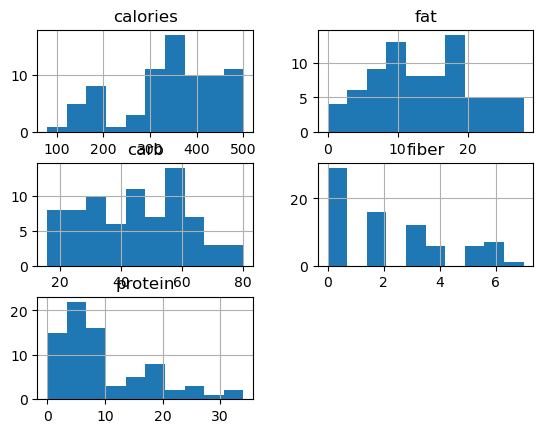

In [33]:
# generate histograms
data_subset.hist()
plt.show()

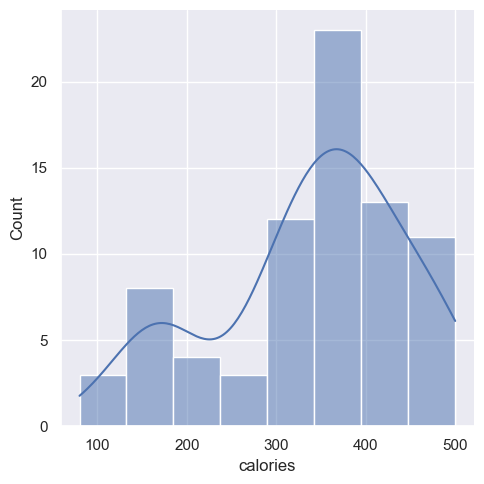

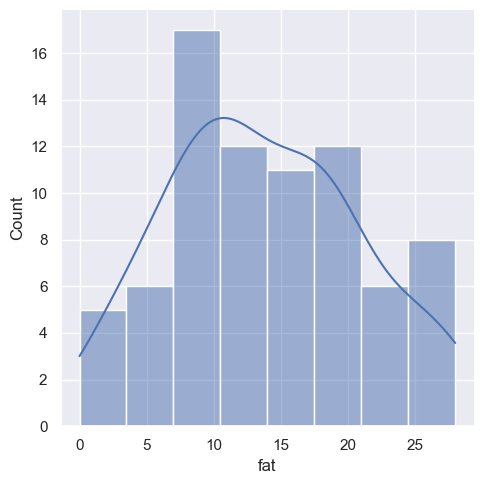

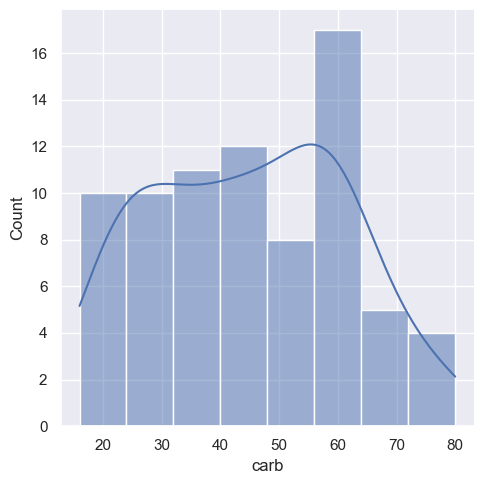

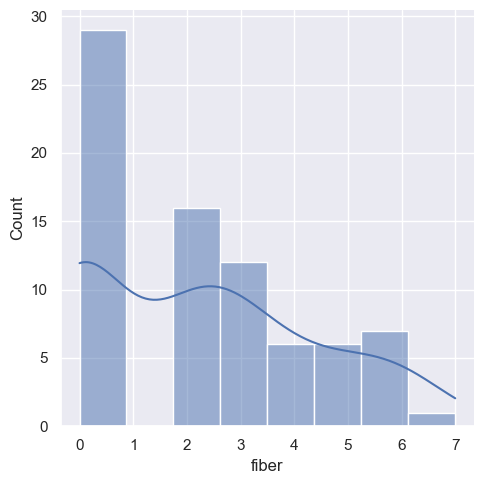

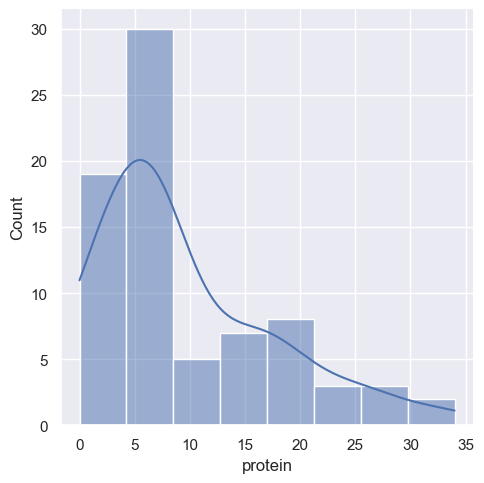

In [50]:
# use seaborn displots

sns.set()

sns.displot(x=data_subset['calories'], kde=True, ax=ax[0,0])
sns.displot(x=data_subset['fat'], kde=True, ax=ax[0,1])
sns.displot(x=data_subset['carb'], kde=True, ax=ax[1,0])
sns.displot(x=data_subset['fiber'], kde=True, ax=ax[1,1])
sns.displot(x=data_subset['protein'], kde=True, ax=ax[2,0])

fig.tight_layout()
plt.show()

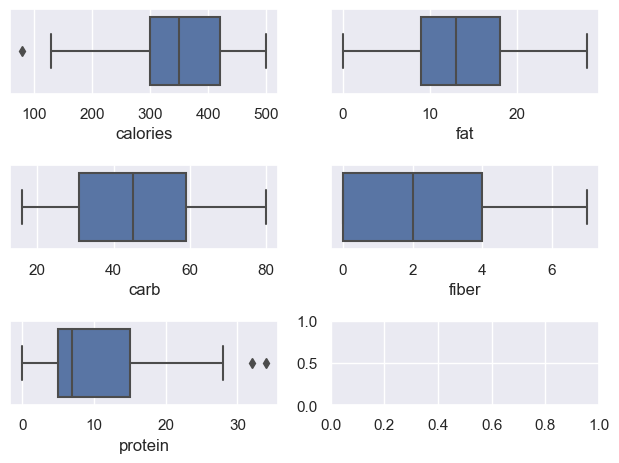

In [40]:
# generate boxplots

sns.set()

fig, ax = plt.subplots(3,2)

sns.boxplot(x=data_subset['calories'], ax=ax[0,0])
sns.boxplot(x=data_subset['fat'], ax=ax[0,1])
sns.boxplot(x=data_subset['carb'], ax=ax[1,0])
sns.boxplot(x=data_subset['fiber'], ax=ax[1,1])
sns.boxplot(x=data_subset['protein'], ax=ax[2,0])

fig.tight_layout()
plt.show()

#### Question 5: What's a word cloud look like of the items?

In [41]:
#pip install wordcloud


     -------------------------------------- 153.3/153.3 kB 1.0 MB/s eta 0:00:00


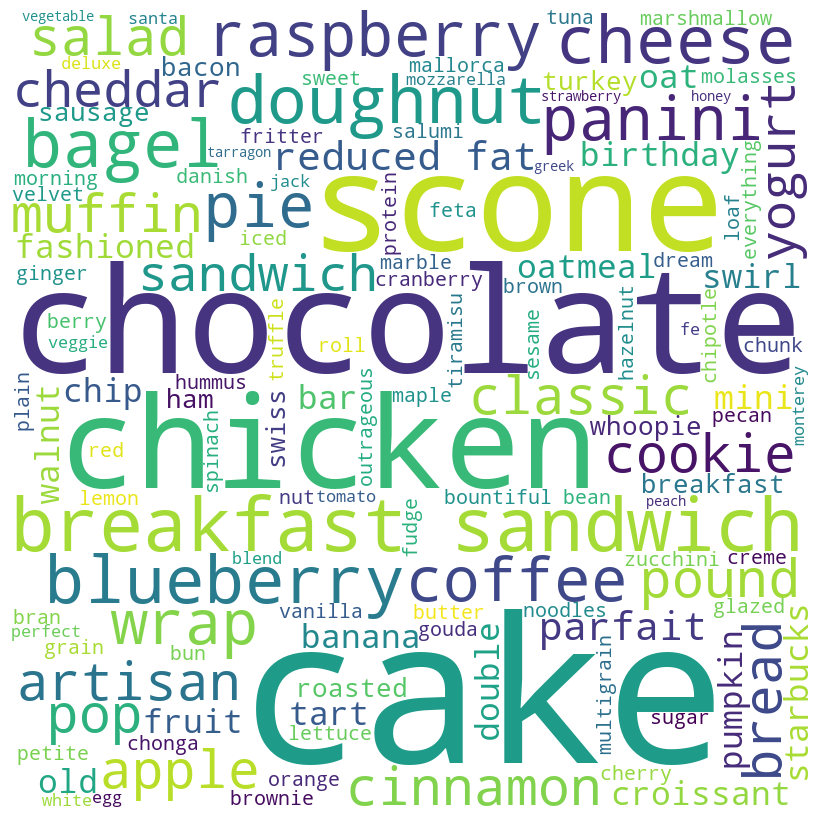

In [42]:
#generate word cloud
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data['item']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Question 6: What are the highest calorie items?

In [45]:
# generate table of highest calorie items

data.sort_values('calories', ascending=False)[['item', 'calories']].head(10)

,item,calories
61,Sausage & Cheddar Classic Breakfast Sandwich,500
21,Iced Lemon Pound Cake,490
3,Banana Nut Loaf,490
40,Zucchini Walnut Muffin,490
16,Cranberry Orange Scone,490
15,Cinnamon Chip Scone,480
33,Pumpkin Scone,480
41,Cheese & Fruit,480
34,Raspberry Scone,480
6,Blueberry Scone,460


#### Question 7: What are the "healthiest" items? Healthiest being lowest in fat and carbs, and highest in fiber and protein.

In [47]:
# generate table of items w/ lowest fat, carbs and highest fiber, protein

data.sort_values(by=['fat', 'carb', 'fiber', 'protein'], ascending=[True, True, False, False]).head(10)

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
66,67,Deluxe Fruit Blend,80,0.0,20,2,0,salad
31,32,Plain Bagel,280,1.0,59,2,9,bakery
19,20,Everything with Cheese Bagel,280,2.0,56,2,10,bakery
63,64,Starbucks Perfect Oatmeal,140,2.5,25,4,5,hot breakfast
27,28,Multigrain Bagel,300,3.0,60,6,15,bakery
76,77,Strawberry & Blueberry Yogurt Parfait,300,3.5,60,3,7,parfait
25,26,Marshmallow Dream Bar,210,4.0,43,0,0,bakery
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait
30,31,Petite Vanilla Bean Scone,140,5.0,21,0,0,bakery
14,15,Chonga Bagel,310,5.0,52,3,12,bakery


#### Conclusion

In this analysis of Starbuck's food menu, we answered several important questions. We determined what their healthiest items were, their highest calorie items, the general distributions of their items' nutritional values, the relationships of carbs vs. fat vs. calories, the distribution of Starbucks food types, and created a fun word cloud of their menu items. 